# Homework 3 Q1:


In [ ]:
#@title Default title text
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
Created on Tue Feb 23 13:36:10 2021

@author: daniel
"""
import numpy as np 
import pandas as pd 
import seaborn as sb 
import matplotlib.pyplot as plt

# Subfunctions for my Python methods
def bracket_update(f,x0,x1,xr): 
    """
    with given bounds (x0 and x1) and section point (xr) defines two subbrackets, 
    checks if each sub-bracket contains by evaluating f(xi) to see if subbracket 
    contains a root and updates/returns the new bracket
    """
    # update bracket:
    err = False    
    if f(x0) * f(xr) < 0: 
        bracket=[x0,xr]
    elif f(xr) * f(x1) < 0: 
        bracket= [xr,x1]
    else: 
        bracket = [np.nan,np.nan]
        err = True
    return bracket, err

def bracket_contains_root(f,x0,x1): 
  """
  checks if bounds have opposite sign, i.e. contain a root
  """
  if np.sign(f(x0)) != np.sign(f(x1)): 
      return True
  else:
      return False

def ForwardFiniteDiff(f,x,dx=1e-6,xopt_true=None):
  """
  numerically estimates a first derivative using finite diff.
  """
  return ( f(x+dx) - f(x) ) / (dx)

def CentralFiniteDiff(f,x,dx=1e-6): 
  """
  numerically estimates a first derivative using finite diff.
  """
  return ( f(x+dx) - f(x-dx)) / (2*dx)

def SecondOrderFiniteDiff(f,x,dx=1e-6): 
  """
  numerically estimates a second derivative using finite diff.
  """
  return ( f(x+dx) - 2*f(x) + f(x-dx) ) / (dx**2)


# Numerical Root Finding Methods
def bisection_root(f,lower_bound,upper_bound,tol=1e-6,xtrue=None):
    # initialize: 
    x0,x1 = lower_bound, upper_bound
    data, Ea = [], [] 
    # check if inital guess contains a root: 
    if not bracket_contains_root(f,x0,x1):
        print('bounds do not contain a root')
        return np.nan
    
    # Get number of bisections for desired tolerance: 
    N = int(np.ceil(np.log(abs(x1 - x0)/tol)/np.log(2.0)))

    print(f'{N} bisections required for a tolerance of {tol}.')
    
    max_iter = 100 
    for i in range(max_iter): 
        # rules for first iter step 
        if i == 0:
            xr = 0.5 * (x0 + x1)  # estimate new bisection here
            data.append([x0,x1,xr])
            Ea.append(np.nan)
        # rules for every other iter step
        else: 
            xr_old = xr
            # update bracket:
            bracket, bracket_error = bracket_update(f, x0, x1, xr)
            x0, x1 = bracket
            # checks
            if (bracket_error is True) or (bracket_contains_root(f,x0,x1) is False):
                print('Error')
                break   
            
            xr = 0.5 * (x0 + x1)           
            data.append([x0,x1,xr])
            # calculate approx error:
            err = abs((xr - xr_old)/xr) * 100 
            Ea.append(err)
            if err < tol: 
                break
        
    # collect data into DataFrame
    data = pd.DataFrame(data,columns=['x_low','x_up','x_root'])
    data['Ea'] = Ea
    # calculate true error (Et) if possible:
    if xtrue is not None: 
        data['Et'] = abs((data.x_root - xtrue)/xtrue) * 100
    print(f'numerical root = {xr}')
    print(f'approx. error  = {Ea[-1]}%')
    return xr, data


def false_position(f,lower_bound,upper_bound,tol=1e-6,xtrue=None,max_iter=50):
    # subfunctions
    def false_pos_formula(x0,x1):
      # used to update the bracket
        return x1 - ( (f(x1)* (x0 - x1)) / ( f(x0)-f(x1) ))
    
    # initialize: 
    x0,x1 = lower_bound, upper_bound
    data, Ea = [], [] 
    
    # check if inital guess contains a root: 
    if not bracket_contains_root(f,x0,x1):
        print('bounds do not contain a root')
        return np.nan   
    
    for i in range(max_iter): 
        if i == 0: 
            xr = false_pos_formula(x0,x1) 
            data.append([x0,x1,xr])
            Ea.append(np.nan)
        else: 
            xr_old = xr
            # update bracket:
            bracket, bracket_error = bracket_update(f, x0, x1, xr)
            x0, x1 = bracket
            # checks
            if (bracket_error is True) or (bracket_contains_root(f,x0,x1) is False):
                print('Error')
                break   
            
            xr = false_pos_formula(x0,x1) 
            data.append([x0,x1,xr])
            # calculate approx error:
            err =  abs((xr - xr_old)/xr) * 100 
            Ea.append(err)
            # stopping criterion: 
            if err < tol: 
                break
    
    # collect data into DataFrame
    data = pd.DataFrame(data,columns=['x_low','x_up','x_root'])
    data['Ea'] = Ea
    # calculate true error (Et) if possible:
    if xtrue is not None: 
        data['Et'] = abs((data.x_root - xtrue)/xtrue) * 100
    print(f'numerical root = {xr}')
    print(f'approx. error  = {Ea[-1]}%')
    return xr, data            
     

def secant_root(f,x0,x1,tol=1e-6,xtrue=None,max_iter=50): 
    # init
    err = np.nan
    data = [] 
    # iter solve
    for i in range(max_iter):
        # eval f(x) at x0, x1, and x
        fx0, fx1 = f(x0), f(x1)
        # update x0, x1: 
        x = x1 - (fx1 * (x0 - x1))/(fx0 - fx1) 
        fx = f(x)
        
        # break if x0,x1, or x is root: 
        for fi in [fx0,fx1,fx]:
            if fi == 0.0:
                root = fi; break
        
        # calc. err: 
        err = 100 * abs((x - x1)/x)        

        # save data
        data.append([x0,x1,x,err])
        if err < tol: 
            break
        else: 
            # update x0,x1: 
            x1, x0 = x, x1
    root = x   
    data = pd.DataFrame(data,columns=['x0','x1','x_root','Ea'])
    # calculate true error (Et) if possible:
    if xtrue is not None: 
        data['Et'] = abs((data.x_root - xtrue)/xtrue) * 100
    
    print(f'numerical root = {root}')
    print(f'approx. error  = {err}%')
    return x, data        
        
def NewtonRaphsonRoot(f,x0,tol=1e-6,xtrue=None,max_iter=50): 
    # initialize: 
    err = np.nan
    data = [] 
    if f(x0) == 0.0:
        return x0
    for i in range(max_iter):
        dfdx = CentralFiniteDiff(f,x0)
        f0 = f(x0)
        x = x0 - (f0 / dfdx)
        err = abs((x - x0)/x) * 100
        x0 = x 
        data.append([x,err])
        if (err < tol) or (f0 == 0.0): 
            break 
    data = pd.DataFrame(data,columns=['x_root','Ea'])
    # calculate true error (Et) if possible:
    if xtrue is not None: 
        data['Et'] = abs((data.x_root - xtrue)/xtrue) * 100
    print(f'numerical root = {x}')
    print(f'approx. error  = {err}%')

    return x, data

In [ ]:
#@title Custom Py code for this assignment. (Hidden for conciseness, double click to expand)
def myax(ax):
    ax.grid(True,alpha=0.2)
    ax.axhline(0,lw=1,c='k')
    ax.axvline(0,lw=1,c='k')
    ax.legend()

def plot_eq(f,bounds,ax):
    b0,b1 = bounds 
    x = np.linspace(b0,b1,100)
    ax.plot(x,f(x),label='f(x)')
    ax.set_xlabel('x')
    ax.set_ylabel('f(x)')
    myax(ax) 

def plot_root(f,root,ax,meth):
    ax.scatter(root,f(root),ec='k',label=meth)    
      
def plot_err(res,ax,subtitle): 
    ax.plot(res.index[1:],res.Ea[1:],label=r'$E_a$')
    ax.plot(res.index,res.Et,ls='--',label=r'$E_t$')
    ax.set_title(subtitle)
    myax(ax)

def get_data(f,tol,lower_bound,upper_bound,x0,xtrue):    
    # init 
    data = {} 
    
    meth = 'bisection'; print('\n'+meth)
    xr, res = bisection_root(f, lower_bound, upper_bound,tol=tol,xtrue=xtrue)
    Ea = res.Ea.iloc[-1]
    Et = res.Et.iloc[-1]
    n_iter = len(res)
    data.update({meth:{'num root':xr,
                      'Ea':Ea,
                      'Et':Et,
                      'n_iter':n_iter,
                      'df':res}})
    
    meth = 'false position'; print('\n'+meth)
    xr, res = false_position(f, lower_bound, upper_bound,tol=tol,xtrue=xtrue)
    Ea = res.Ea.iloc[-1]
    Et = res.Et.iloc[-1]
    n_iter = len(res)
    data.update({meth:{'num root':xr,
                      'Ea':Ea,
                      'Et':Et,
                      'n_iter':n_iter,
                      'df':res}})
    
    meth = 'newton raphson'; print('\n'+meth)
    xr, res = NewtonRaphsonRoot(f,x0,tol=tol,xtrue=xtrue)
    Ea = res.Ea.iloc[-1]
    Et = res.Et.iloc[-1]
    n_iter = len(res)
    data.update({meth:{'num root':xr,
                      'Ea':Ea,
                      'Et':Et,
                      'n_iter':n_iter,
                      'df':res}})
    
    meth = 'secant'; print('\n'+meth)
    xr, res = secant_root(f,lower_bound,upper_bound,tol=tol,xtrue=xtrue)
    Ea = res.Ea.iloc[-1]
    Et = res.Et.iloc[-1]
    n_iter = len(res)
    data.update({meth:{'num root':xr,
                      'Ea':Ea,
                      'Et':Et,
                      'n_iter':n_iter,
                      'df':res}})
    return data


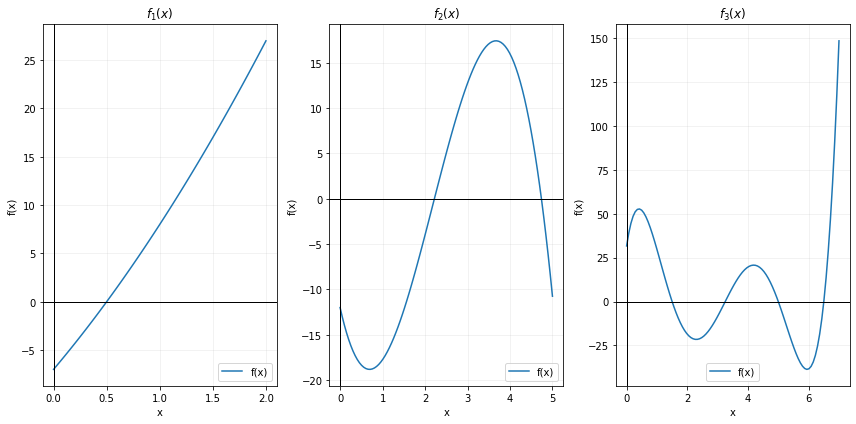

In [ ]:
def f1(x): 
    return 2*x**2 + 13*x -7 

def f2(x): 
    return -12 - 21*x +18*x**2 - 2.75*x**3

def f3(x): 
    P5,P4,P3,P2,P1,P0 = [1.0, -16.05, 88.75,-192.0375,116.35,31.6875]
    return P5*x**5 + P4*x**4 + P3*x**3 + P2*x**2 + P1*x**1 + P0 

# plot figures
fig, axes = plt.subplots(1,3,squeeze=True,figsize=(12,6))
plot_eq(f1,(0,2),axes[0]); axes[0].set_title(r'$f_1(x)$')
plot_eq(f2,(0,5),axes[1]); axes[1].set_title(r'$f_2(x)$')
plot_eq(f3,(0,7),axes[2]); axes[2].set_title(r'$f_3(x)$')
fig.tight_layout()

In [ ]:
# find a root for f1(x), f2(x), and f3(x):
# To save space I compiled the steps to find a given root in "Custum Functions" see above
print('\nf1')
data_f1 = get_data(f1,1e-4, 0.1, 4.2, 0.1, 1/2)
print('\nf2')
data_f2 = get_data(f2,1e-4, 0.1, 3.2, 2, 2.21982)
print('\nf3')
data_f3 = get_data(f3,1e-4, 2.3, 4, 2, 3.25)




f1

bisection
16 bisections required for a tolerance of 0.0001.
numerical root = 0.5000001072883606
approx. error  = 9.775159644754178e-05%

false position
numerical root = 0.4999997641417835
approx. error  = 9.561823198411168e-05%

newton raphson
numerical root = 0.5
approx. error  = 1.5223176053069665e-07%

secant
numerical root = 0.5000000000000004
approx. error  = 1.2077286948297672e-07%

f2

bisection
15 bisections required for a tolerance of 0.0001.
numerical root = 2.219819116592407
approx. error  = 6.659079468246022e-05%

false position
numerical root = 2.2198182988813895
approx. error  = 4.573813079311201e-09%

newton raphson
numerical root = 2.2198182988813855
approx. error  = 4.658169988159359e-06%

secant
numerical root = 2.2198182988813855
approx. error  = 4.5739931302140544e-09%

f3

bisection
15 bisections required for a tolerance of 0.0001.
numerical root = 3.250001716613769
approx. error  = 9.97689527090724e-05%

false position
numerical root = 3.250000000316426
appro

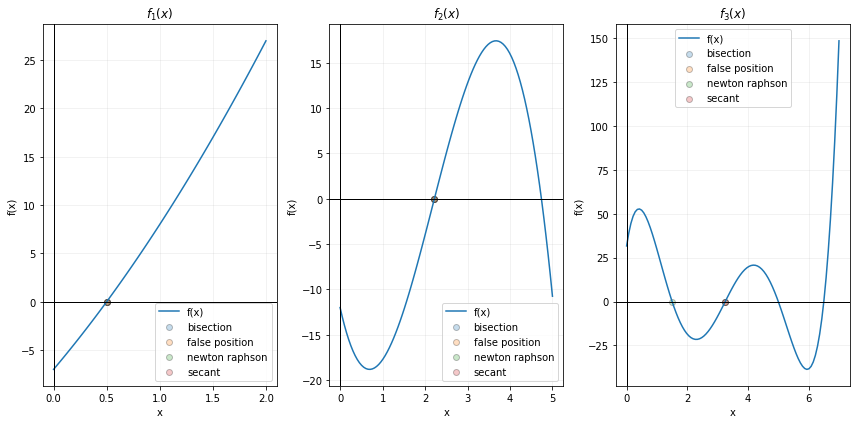

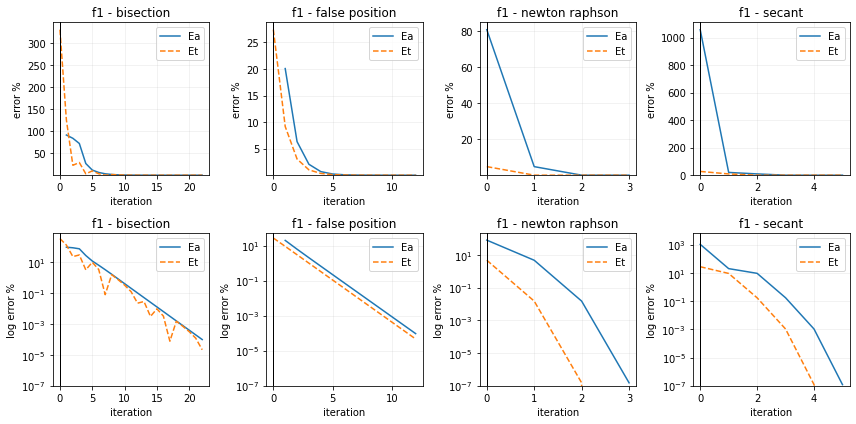

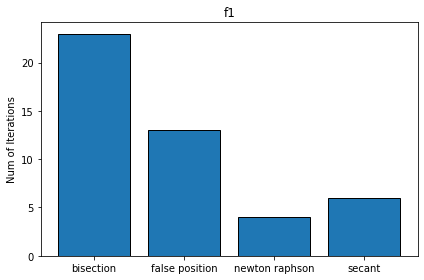

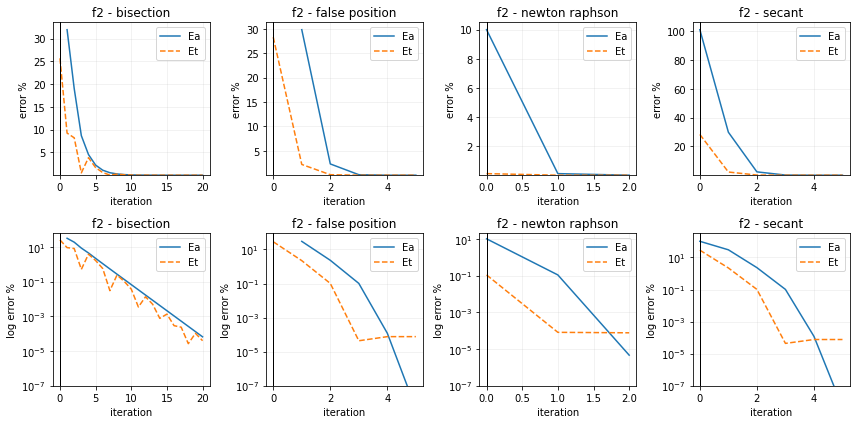

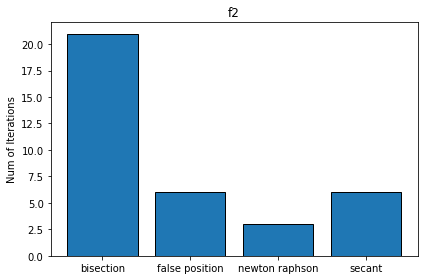

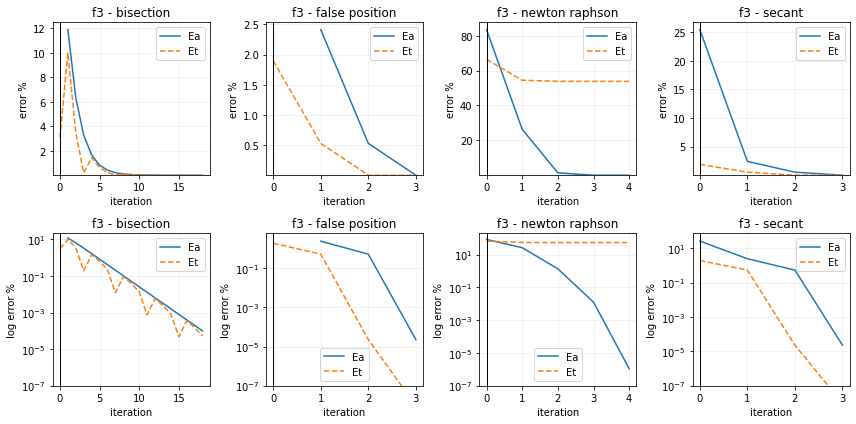

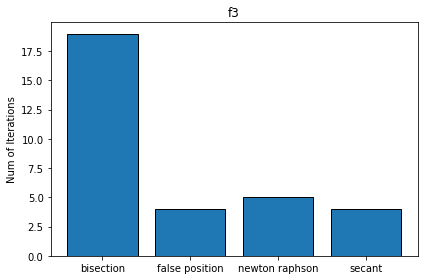

In [ ]:
fig0, axes0 = plt.subplots(1,3,squeeze=True,figsize=(12,6))
# plot figures
plot_eq(f1,(0,2),axes0[0]); axes0[0].set_title(r'$f_1(x)$')
plot_eq(f2,(0,5),axes0[1]); axes0[1].set_title(r'$f_2(x)$')
plot_eq(f3,(0,7),axes0[2]); axes0[2].set_title(r'$f_3(x)$')
fig0.tight_layout()
for mydict,name in list(zip([data_f1,data_f2,data_f3],['f1','f2','f3'])):
    X,h = [],[]
    
    fdict1 = {'f1':f1,'f2':f2,'f3':f3}
    fdict2 = {'f1':(0,2),'f2':(0,5),'f3':(0,7)}
    fdict3 = {'f1':0,'f2':1,'f3':2}
    
    fig, axes = plt.subplots(2,4,squeeze=True,figsize=(12,6))
    for n,meth in enumerate(mydict.keys()):
        res = mydict[meth]['df']
        ax = axes[0,n]
        ax.plot(res.index,res.Ea,label='Ea')
        ax.plot(res.index,res.Et,label='Et',ls='--')
        myax(ax)
        ax.set_title(f"{name} - {meth}")
        ax.set_ybound(1e-7)
        ax.set_ylabel('error %')
        ax.set_xlabel('iteration')
        
        ax = axes[1,n]
        ax.plot(res.index,res.Ea,label='Ea')
        ax.plot(res.index,res.Et,label='Et',ls='--')
        myax(ax)
        ax.set_title(f"{name} - {meth}")
        ax.set_yscale('log')
        ax.set_ybound(1e-7)
        ax.set_ylabel('log error %')
        ax.set_xlabel('iteration')
        
        ax = axes0[fdict3[name]]
        xx = mydict[meth]['num root']
        ax.scatter(xx,fdict1[name](xx),label=meth,alpha=0.25,ec='k')
        
        X.append(meth)
        h.append(len(res))
    fig.tight_layout()
    
    fig, axes = plt.subplots(1,1)
    axes.bar([0,1,2,3],h,tick_label=X,ec='k')
    axes.set_ylabel('Num of Iterations')
    axes.set_title(name)
    fig.tight_layout()
axes0[0].legend()
axes0[1].legend()
axes0[2].legend()

Some example commnets you could say about your results: 


*   For all three functions, Biscetion method took the most iteration steps, but convergence was succesfull, as long as the inital bounds contained a root.

*   For all three functions, Newton Raphson method was the fastest to converge,  taking significantly fewer itreations to identify a root. However, depending on the intial guess, might find a different root, or not converge at all. 

*   The use of fintie difference increase the evaluation costs associated with the function you are trying to solve, since it requires a evaluate at x and at x+h. This cost could become significant when solving for complex or expensive models. 







In [ ]:
data = [] 
# newton raphson vs intial guess: 
for delt in np.linspace(0.1,3,20):
    xtrue = 2.21982
    x0 = xtrue + delt 
    xr, res = NewtonRaphsonRoot(f2,x0,tol=1e-6,xtrue=xtrue)
    data.append([x0-xtrue,len(res),res.Et.iloc[-1],xr])

    x0 = xtrue - delt 
    xr, res = NewtonRaphsonRoot(f2,x0,tol=1e-6,xtrue=xtrue)
    data.append([x0-xtrue,len(res),res.Et.iloc[-1],xr])



numerical root = 2.2198182988813855
approx. error  = 1.7425770502882484e-07%
numerical root = 2.219818298881385
approx. error  = 1.302754306402555e-08%
numerical root = 2.2198182988813855
approx. error  = 2.600735263314134e-13%
numerical root = 2.219818298881386
approx. error  = 8.002262348658873e-14%
numerical root = 2.2198182988813855
approx. error  = 2.8207974779022537e-11%
numerical root = 2.2198182988813855
approx. error  = 4.507274267882111e-11%
numerical root = 2.2198182988813855
approx. error  = 2.094792226320177e-10%
numerical root = 2.2198182988813855
approx. error  = 7.016503661239331e-09%
numerical root = 2.219818298881386
approx. error  = 4.195975859578227e-07%
numerical root = 2.2198182988813855
approx. error  = 5.664930152982873e-07%
numerical root = 2.219818298881386
approx. error  = 1.9405486195497767e-12%
numerical root = 2.219818298881386
approx. error  = 3.8010746156129645e-13%
numerical root = 2.219818298881385
approx. error  = 1.7504184671636997e-07%
numerical roo

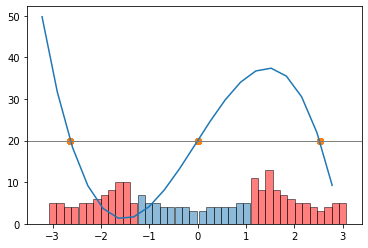

In [ ]:
data = pd.DataFrame(data,columns=['delx','n','boo','xr'])

x = data[data.boo < 1].delx
y = data[data.boo < 1].n
plt.bar(x,y,alpha=0.5,width=0.15,ec='k')

x = data[data.boo > 1].delx
y = data[data.boo > 1].n
plt.bar(x,y,alpha=0.5,color='r',ec='k',width=0.15)

x = np.linspace(-1,5,20)
plt.plot(x-xtrue,f2(x)+20)
plt.scatter(data.xr - xtrue,f2(data.xr)+20)
plt.axhline(20,lw=1,c='grey')

Above graphs demonstrates that for open methods, the choice of inital guess can effect the resulting numerical estimate of the root. For example if we are interested in the middle root in f2, as our initial guess gets further from the desired root, the method will converge on different roots. For f2, if the intial guess is less than+- 1.0 of the desired root the Newton Raphons method will return the desired root (in blue). If the intial guess is greater than +- 1 of the desired root, the method will converg on different roots (in red).  